In [1]:
import matplotlib.pyplot as plt

In [2]:
INITIAL_HEIGHT = 50 #m
GRAVITAIONAL_ACCELERATION = 9.81 #m/s^2
TIME_TO_GROUND = 5 #seconds
MASS_BASKETBALL = 0.6 #kg 

In [3]:
def force_gravity( m=MASS_BASKETBALL, g=GRAVITAIONAL_ACCELERATION ):
    return -m*g

In [4]:
def force_friction(k, v):
    return k*(v**2)

In [5]:
def simulate( k, m=MASS_BASKETBALL, dt=0.01, plot=True ) -> float: 

    time = [ 0 ]
    height = [ INITIAL_HEIGHT ]
    velocity = [ 0 ]
    net_force = []

    # this value doesn't change, so only calculate once
    FORCE_OF_GRAVITY = force_gravity()

    while time[-1] < TIME_TO_GROUND:

        instantaneous_net_force = FORCE_OF_GRAVITY + force_friction(k, velocity[-1])
        net_force.append(instantaneous_net_force)

        acceleration = instantaneous_net_force / m

        instantaneous_velocity = velocity[-1] + acceleration*dt
        
        time.append( time[-1] + dt )  
        velocity.append(instantaneous_velocity)

        instantaneous_height = height[-1] + velocity[-1]*dt

        height.append(instantaneous_height)

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

        ax1.scatter(time, height)
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Height (m)')
        ax2.scatter(time, velocity)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Velocity (m/s)')
        ax3.scatter(time[1:], net_force)
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Net Force (N)')
    
    return height[-1]



K:  1
Ending height after 5 seconds: 38.241612819577476 m


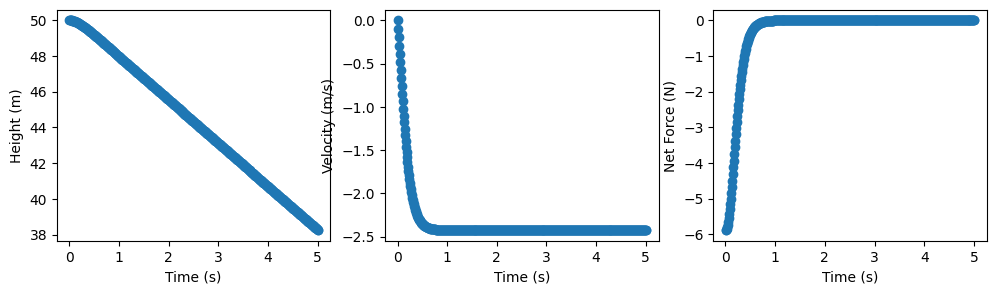

In [6]:
k = 1
print ('K: ', k)
ending_height = simulate(k)

print(f"Ending height after {TIME_TO_GROUND} seconds: {ending_height} m")

K:  0
Ending height after 5 seconds: -73.36173099999993 m


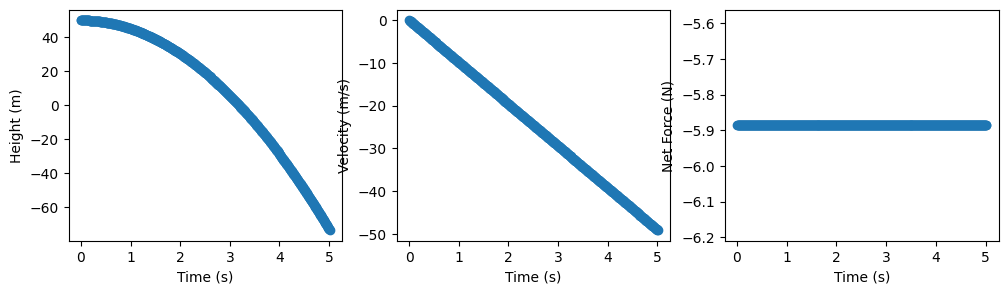

In [7]:
k = 0
print ('K: ', k)
ending_height = simulate(k)

print(f"Ending height after {TIME_TO_GROUND} seconds: {ending_height} m")

K:  0.5
Ending height after 5 seconds: 33.61470930509138 m


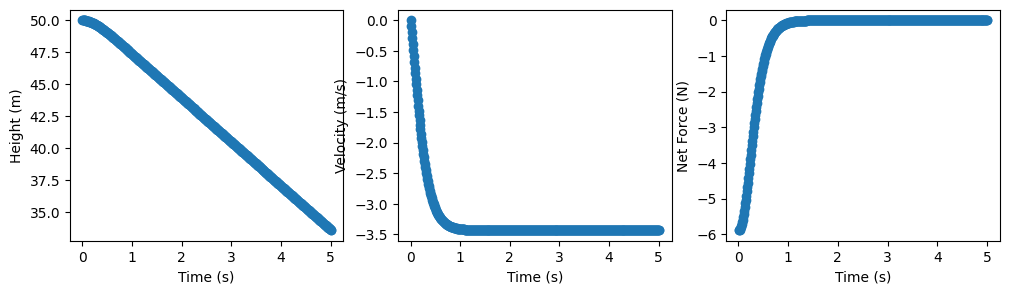

In [8]:
k = 0.5
print ('K: ', k)
ending_height = simulate(k)

print(f"Ending height after {TIME_TO_GROUND} seconds: {ending_height} m")

In [9]:
k = 1
for i in range(1, 50):

    print ('Simulation #', i, 'k =', k, )

    ending_height = simulate(k, plot=False)

    print ('Ending height: ', ending_height)

    # didn't reach the ground, too much friction
    if ending_height > 0:
        k -= 0.5**i

    # reached the ground too soon, too little friction
    else:
        k += 0.5**i

print (k)


Simulation # 1 k = 1
Ending height:  38.241612819577476
Simulation # 2 k = 0.5
Ending height:  33.61470930509138
Simulation # 3 k = 0.25
Ending height:  27.31490140044069
Simulation # 4 k = 0.125
Ending height:  18.892868816839247
Simulation # 5 k = 0.0625
Ending height:  7.956465477726084
Simulation # 6 k = 0.03125
Ending height:  -5.574213984343607
Simulation # 7 k = 0.046875
Ending height:  2.639523476733508
Simulation # 8 k = 0.0390625
Ending height:  -0.9559402925557409
Simulation # 9 k = 0.04296875
Ending height:  0.944641860554528
Simulation # 10 k = 0.041015625
Ending height:  0.022634114157057184
Simulation # 11 k = 0.0400390625
Ending height:  -0.4592205311521924
Simulation # 12 k = 0.04052734375
Ending height:  -0.2164823025720749
Simulation # 13 k = 0.040771484375
Ending height:  -0.09647708807978084
Simulation # 14 k = 0.0408935546875
Ending height:  -0.0368104393774618
Simulation # 15 k = 0.04095458984375
Ending height:  -0.007060488026110659
Simulation # 16 k = 0.0409851

K:  0.0409690918870691
Ending height after 10 seconds: 4.3968995111498543e-13 m


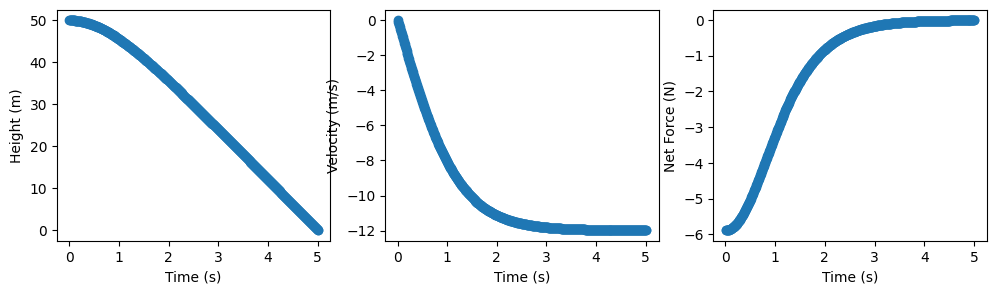

In [10]:
print ('K: ', k)
ending_height = simulate(k)

print(f"Ending height after 10 seconds: {ending_height} m")

In [14]:
round(k, 2)

0.04

In [13]:
int(round(k, 2) * 100)

4